# Project 2: Topic Classification

In this project, you'll work with text data from newsgroup postings on a variety of topics. You'll train classifiers to distinguish between the topics based on the text of the posts. Whereas with digit classification, the input is relatively dense: a 28x28 matrix of pixels, many of which are non-zero, here we'll represent each document with a "bag-of-words" model. As you'll see, this makes the feature representation quite sparse -- only a few words of the total vocabulary are active in any given document. The bag-of-words assumption here is that the label depends only on the words; their order is not important.

The SK-learn documentation on feature extraction will prove useful:
http://scikit-learn.org/stable/modules/feature_extraction.html

Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please prepare your own write-up and write your own code.

In [21]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.grid_search import GridSearchCV

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# SK-learn library for importing the newsgroup data.
from sklearn.datasets import fetch_20newsgroups

# SK-learn libraries for feature extraction from text.
from sklearn.feature_extraction.text import *

Load the data, stripping out metadata so that we learn classifiers that only use textual features. By default, newsgroups data is split into train and test sets. We further split the test so we have a dev set. Note that we specify 4 categories to use for this project. If you remove the categories argument from the fetch function, you'll get all 20 categories.

In [2]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train',
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test',
                                     remove=('headers', 'footers', 'quotes'),
                                     categories=categories)

num_test = len(newsgroups_test.target)
test_data, test_labels = newsgroups_test.data[num_test/2:], newsgroups_test.target[num_test/2:]
dev_data, dev_labels = newsgroups_test.data[:num_test/2], newsgroups_test.target[:num_test/2]
train_data, train_labels = newsgroups_train.data, newsgroups_train.target

print 'training label shape:', train_labels.shape
print 'test label shape:', test_labels.shape
print 'dev label shape:', dev_labels.shape
print 'labels names:', newsgroups_train.target_names

training label shape: (2034L,)
test label shape: (677L,)
dev label shape: (676L,)
labels names: ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']


(1) For each of the first 5 training examples, print the text of the message along with the label.

In [3]:
#def P1(num_examples=5):
### STUDENT START ###

# Loop through first 5 values in the training data
for x in range(5):
    # Print the number and Category
    print "------------- Sample #" + str(x+1) + ", Category: " + \
    str(categories[train_labels[x]]) + " -------\n" + str(train_data[x]) + "\n" 
### STUDENT END ###
#P1()

------------- Sample #1, Category: talk.religion.misc -------
Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych

------------- Sample #2, Category: sci.space -------


Seems to be, barring evidence to the contrary, that Koresh was simply
another deranged fanatic who thought it neccessary to take a whole bunch of
folks with him, children and all, to satisfy his delusional mania. Jim
Jones, circa 1993.


Nope - fruitcakes like Koresh have 

(2) Use CountVectorizer to turn the raw training text into feature vectors. You should use the fit_transform function, which makes 2 passes through the data: first it computes the vocabulary ("fit"), second it converts the raw text into feature vectors using the vocabulary ("transform").

The vectorizer has a lot of options. To get familiar with some of them, write code to answer these questions:

a. The output of the transform (also of fit_transform) is a sparse matrix: http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.csr_matrix.html. What is the size of the vocabulary? What is the average number of non-zero features per example? What fraction of the entries in the matrix are non-zero? Hint: use "nnz" and "shape" attributes.

b. What are the 0th and last feature strings (in alphabetical order)? Hint: use the vectorizer's get_feature_names function.

c. Specify your own vocabulary with 4 words: ["atheism", "graphics", "space", "religion"]. Confirm the training vectors are appropriately shaped. Now what's the average number of non-zero features per example?

d. Instead of extracting unigram word features, use "analyzer" and "ngram_range" to extract bigram and trigram character features. What size vocabulary does this yield?

e. Use the "min_df" argument to prune words that appear in fewer than 10 documents. What size vocabulary does this yield?

f. Using the standard CountVectorizer, what fraction of the words in the dev data are missing from the vocabulary? Hint: build a vocabulary for both train and dev and look at the size of the difference.

In [4]:
#def P2():
### STUDENT START ###

# First create a CountVectorizer instance
train_vector = CountVectorizer()
# Use fix_transform on train data
X_train_matrix = train_vector.fit_transform(train_data)

#---------- A ---------------#
print "#### a. ####"
# Question: What is the size of the vocabulary?
print "- Question: What is the size of the vocabulary?"
print "The vocabulary is of size: " + str(X_train_matrix.shape[1])

# Question: What is the average number of non-zero features per example? 
print "- Question: What is the average number of non-zero features per example?"
non_zero_train = X_train_matrix.nnz
print "The number of non-zero entries in the matrix are: " + str(non_zero_train)
train_examples_count = X_train_matrix.shape[0]
print "The number of exaples are: " + str(X_train_matrix.shape[0])
nonzero_per_example = non_zero_train/train_examples_count 
print "The number of non-zero features per example: " + str(nonzero_per_example)

# Question: What fraction of the entries in the matrix are non-zero? 
print "- Question: What fraction of the entries in the matrix are non-zero?"
train_count_size = X_train_matrix.shape[0] * X_train_matrix.shape[1]
print "Percent of the matrix that are non zero: " + \
str(round(np.divide(float(non_zero_train), float(train_count_size)) * 100.0, 4)) + "%"

#---------- B ---------------#
print "\n#### b. ####"
print "- Question: What are the 0th and last feature strings (in alphabetical order)?"
vocab_all = train_vector.get_feature_names()
vocab_all.sort() # Sort in alphabetical order
print "The 0th feature string is: " + vocab_all[0] # Show the first feature
print "The last feature string is: " + vocab_all[-1] # Show the last feature

#---------- C ---------------#
print "\n#### c. #### Specify your own vocabulary with 4 words: atheism, graphics, space, religion"

# First create a new CountVectorizer instance with vocabulary
train_4vocab = CountVectorizer(vocabulary=["atheism", "graphics", "space", "religion"])
# Use fix_transform on train data
X_train_4vocab_matrix = train_4vocab.fit_transform(train_data)

print "We confirm the training vectors are appropriately shaped as: " + str(X_train_4vocab_matrix.shape)

print " - Question: Now what's the average number of non-zero features per example?"
avg_features_4vocab = float(X_train_4vocab_matrix.nnz)/X_train_4vocab_matrix.shape[0]
print "Average number of non-zero features per example: " + str(round(avg_features_4vocab, 4))
print " - Question: What are the 0th and last feature strings (in alphabetical order)?"
vocab = train_4vocab.get_feature_names()
vocab.sort()
print "0th feature string: " + vocab[0]
print "last feature string: " + vocab[-1]

#---------- D ---------------#
print "\n#### d. #### use ""analyzer"" and ""ngram_range"" to extract bigram and trigram character features"
print "- Question: What size vocabulary does this yield?"
train_vector_bigram = CountVectorizer(analyzer='word', ngram_range=(2,2))
bigram_vocab = train_vector_bigram.fit_transform(train_data)
print "Bigram vocabulary lenghth: " + str(bigram_vocab.shape[1])
train_vector_trigram = CountVectorizer(analyzer='word', ngram_range=(3,3))
trigram_vocab = train_vector_trigram.fit_transform(train_data)
print "Trigram vocabulary lenghth: " + str(trigram_vocab.shape[1])

#---------- E ---------------#
print "\n#### e. #### Use the ""min_df"" argument to prune words that appear in fewer than 10 documents."
print "- Question: What size vocabulary does this yield?"
train_vector_min10 = CountVectorizer(min_df=10)
min10_vocab = train_vector_min10.fit_transform(train_data)
print "Pruned vocabulary lenghth: " + str(min10_vocab.shape[1])

#---------- F ---------------#
print "\n#### f. ####"
print "- Question: what fraction of the words in the dev data are missing from the vocabulary?"
# Use fix_transform on train data
train_vector = CountVectorizer()
X_train_matrix = train_vector.fit_transform(train_data)
train_vocab_size = X_train_matrix.shape[1]

# Use fix_transform on dev data
dev_vector = CountVectorizer()
X_dev_matrix = dev_vector.fit_transform(dev_data)
dev_vocab_size = X_dev_matrix.shape[1]

print "Train vocab size: " + str(train_vocab_size)
print "Dev vocab size: " + str(dev_vocab_size)
print "Fraction of dev are missing from vocab: " + str(1-(float(dev_vocab_size)/train_vocab_size))

### STUDENT END ###
#P2()

#### a. ####
- Question: What is the size of the vocabulary?
The vocabulary is of size: 26879
- Question: What is the average number of non-zero features per example?
The number of non-zero entries in the matrix are: 196700
The number of exaples are: 2034
The number of non-zero features per example: 96
- Question: What fraction of the entries in the matrix are non-zero?
Percent of the matrix that are non zero: 0.3598%

#### b. ####
- Question: What are the 0th and last feature strings (in alphabetical order)?
The 0th feature string is: 00
The last feature string is: zyxel

#### c. #### Specify your own vocabulary with 4 words: atheism, graphics, space, religion
We confirm the training vectors are appropriately shaped as: (2034, 4)
 - Question: Now what's the average number of non-zero features per example?
Average number of non-zero features per example: 0.2684
 - Question: What are the 0th and last feature strings (in alphabetical order)?
0th feature string: atheism
last feature strin

(3) Use the default CountVectorizer options and report the f1 score (use metrics.f1_score) for a k nearest neighbors classifier; find the optimal value for k. Also fit a Multinomial Naive Bayes model and find the optimal value for alpha. Finally, fit a logistic regression model and find the optimal value for the regularization strength C using l2 regularization. A few questions:

a. Why doesn't nearest neighbors work well for this problem?

b. Any ideas why logistic regression doesn't work as well as Naive Bayes?

c. Logistic regression estimates a weight vector for each class, which you can access with the coef\_ attribute. Output the sum of the squared weight values for each class for each setting of the C parameter. Briefly explain the relationship between the sum and the value of C.

In [5]:
#def P3():
### STUDENT START ###

# Setup the training vector and transformed data
train_vector = CountVectorizer()
X_train_matrix = train_vector.fit_transform(train_data)
X_dev_matrix = train_vector.transform(dev_data)

####################
##Create a KNN Model
####################
knn_model =  KNeighborsClassifier()
best_k = 0
best_score = 0
for k in range(1,50): # Loop through the range of k values
    # Create the model and fit
    knn_model = KNeighborsClassifier(n_neighbors= k)
    knn_model.fit(X_train_matrix, train_labels)
    knn_pred = knn_model.predict(X_dev_matrix)
    # Compute f1 score
    knn_f1 = metrics.f1_score(dev_labels, knn_pred, average='weighted')
    # Store off score if its the best
    if knn_f1 > best_score:
        best_score = knn_f1
        best_k = k
print "KNN Model f1 Score: %s with k = %s" % (best_score, best_k)

################################
## Multinomial Naive Bayes model
################################
alphas = [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]
best_alpha = 0
best_score = 0
for alpha in alphas: # Loop through possible alpha values
    # Create the model and fit
    multiNB_model = MultinomialNB(alpha = alpha)
    multiNB_model.fit(X_train_matrix, train_labels)
    multiNB_pred = multiNB_model.predict(X_dev_matrix)
    # Compute f1 score
    multiNB_f1 = metrics.f1_score(dev_labels, multiNB_pred, average='weighted')
    # Store off score if its the best
    if multiNB_f1 > best_score:
        best_score = multiNB_f1
        best_alpha = alpha
print "multiNB Model f1 Score: %s with k = %s" % (best_score, best_alpha)

################################
## logistic regression model
################################
cs = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0, 2.0, 10.0]
best_c = 0
best_score = 0
for c in cs: # Loop through possible C values
    # Create the model and fit
    lr_model = LogisticRegression(penalty='l2',C=c)
    lr_model.fit(X_train_matrix, train_labels)
    lr_pred = lr_model.predict(X_dev_matrix)
    # Compute f1 score
    lr_f1 = metrics.f1_score(dev_labels, lr_pred, average='weighted')
    # Store off score if its the best
    if lr_f1 > best_score:
        best_score = lr_f1
        best_c = c
print "Logistic Regression Model f1 Score: %s with C = %s" % (best_score, best_c)



KNN Model f1 Score: 0.463252520975 with k = 41
multiNB Model f1 Score: 0.79030523851 with k = 0.1
Logistic Regression Model f1 Score: 0.710084888911 with C = 0.3


In [6]:
## Logistic regression estimates a weight vector for each class, which you can access with the coef_ attribute.
## Output the sum of the squared weight values for each class for each setting of the C parameter. 
## Briefly explain the relationship between the sum and the value of C.

# Create a function that calculates the sum squared of the coeficcient for each class given the coefficients
def sum_squared(coefs):
    coef_df = pd.DataFrame(coefs).T
    df_categories = ['alt.atheism','comp.graphics','sci.space','talk.religion.misc']
    coef_df.columns = df_categories
    # Make the index the vocab words
    coef_df.index = train_vector.get_feature_names()
    coef_df = np.square(coef_df)
    coef_df = coef_df.sum()
    return coef_df

# Run through each each C value, creating a logistic regression model and print the sum squared values
cs = [0.0001, 0.001, 0.01, 0.3, 0.5, 1.0, 10.0]
ssq = []
scores = []
for c in cs:
    lr_model = LogisticRegression(penalty='l2',C=c)
    lr_model.fit(X_train_matrix, train_labels)
    lr_pred = lr_model.predict(X_dev_matrix)
    lr_f1 = metrics.f1_score(dev_labels, lr_pred, average='weighted') # Compute the score
    vals = sum_squared(lr_model.coef_) # Pull the sum squared values
    # Store sum squared and scores in list
    ssq.append(vals)
    scores.append(lr_f1)

# Format for output
df = pd.DataFrame(ssq) # Create a dataframe for results
df['F1 Score'] = scores # Add F1 score column
df['C Parameter'] = cs # Add C param col
cols = df.columns.tolist() # Pull the columns to change order
cols = cols[-1:] + cols[:-1] # New column order
df = df[cols] # Push new column order
df

### STUDENT END ###
#P3()

,C Parameter,alt.atheism,comp.graphics,sci.space,talk.religion.misc,F1 Score
0,0.0001,0.007702,0.011941,0.009435,0.009103,0.541600
1,0.0010,0.165093,0.200953,0.180671,0.187243,0.619305
2,0.0100,2.541349,2.939709,2.862469,2.250029,0.664700
3,0.3000,69.284647,57.874185,67.903001,59.762299,0.710085
4,0.5000,102.613564,83.120255,99.026837,89.024599,0.708474
5,1.0000,167.001763,130.882139,158.027937,145.770727,0.696086
6,10.0000,586.676476,448.003948,539.296689,530.874833,0.685104


### ANSWER:

#### a. Why doesn't nearest neighbors work well for this problem?

The nearest neighbors doesn't work well because of the large ammount of features (each volcabulary word). It is weighing each word equally when computing the distance it its neighbors which would allow for common words impact and reduce the overall score.

#### b. Any ideas why logistic regression doesn't work as well as Naive Bayes?

Logistic regression looks for a linear relationship between features while naive bayes considers each feature to be independent. When evaluating text the relationship between words logistic regression may run into an issue of multicolinearity when two words are highly correlated.


#### c. Logistic regression estimates a weight vector for each class, which you can access with the coef_ attribute. Output the sum of the squared weight values for each class for each setting of the C parameter. Briefly explain the relationship between the sum and the value of C.

As the value of C increases the sum of the squared weights also increase but at a higher rate. From the sklearn documentation we know that C is the inverse of regularization strength and smaller values specify stronger regularization. With larger regularization (larger C) the model is allowed to create larger weights for each variable. This may lead to overfitting.

(4) Train a logistic regression model. Find the 5 features with the largest weights for each label -- 20 features in total. Create a table with 20 rows and 4 columns that shows the weight for each of these features for each of the labels. Create the table again with bigram features. Any surprising features in this table?

In [7]:
#def P4():
### STUDENT START ###

########################################
## logistic regression model 20 features
########################################

# Setup vector and transformed data
train_vector = CountVectorizer()
X_train_matrix = train_vector.fit_transform(train_data)
X_dev_matrix = train_vector.transform(dev_data)

# Create model
lr_model = LogisticRegression(penalty='l2', C=0.3)
lr_model.fit(X_train_matrix, train_labels)

lr_pred1 = lr_model.predict(X_dev_matrix)
lr_f1_2= metrics.f1_score(y_true = dev_labels, y_pred = lr_pred1, average='weighted')
print "The F1 score of the logistic regression model is: " + str(lr_f1_2)

df_categories = ['alt.atheism','comp.graphics','sci.space','talk.religion.misc']
# Create a pandas dataframe for all the coefficients
coef_df = pd.DataFrame(lr_model.coef_).T
coef_df.columns = df_categories
# Make the index the vocab words
coef_df.index = train_vector.get_feature_names()

# Create pandas dataframe for each top 5 list and concat to final output
print "Top 5 Weighted words for each feature: "
df0 = coef_df.sort_values(df_categories[0], ascending=False).head() 
df1 = coef_df.sort_values(df_categories[1], ascending=False).head() 
df2 = coef_df.sort_values(df_categories[2], ascending=False).head() 
df3 = coef_df.sort_values(df_categories[3], ascending=False).head()
top20_df = pd.concat([df0, df1, df2, df3])
top20_df

The F1 score of the logistic regression model is: 0.710084888911
Top 5 Weighted words for each feature: 


,alt.atheism,comp.graphics,sci.space,talk.religion.misc
bobby,0.707412,-0.168932,-0.246787,-0.333804
atheists,0.702224,-0.090211,-0.230656,-0.509658
religion,0.693046,-0.435138,-0.567788,-0.034280
atheism,0.692710,-0.304554,-0.309609,-0.339785
islam,0.591362,-0.098302,-0.243943,-0.246843
graphics,-0.561696,1.413653,-0.945170,-0.536507
image,-0.395116,0.955095,-0.566435,-0.322608
file,-0.238940,0.915673,-0.595352,-0.428460
3d,-0.263132,0.810996,-0.481086,-0.272729
computer,0.025219,0.751228,-0.488698,-0.336741


In [8]:
########################################
## logistic regression bigram
########################################

train_vector_bigram = CountVectorizer(analyzer='word', ngram_range=(2,2))
bigram_vocab = train_vector_bigram.fit_transform(train_data)
X_dev_matrix_bigram = train_vector_bigram.transform(dev_data)


lr_model_bigram = LogisticRegression(penalty='l2', C=0.3)
lr_model_bigram.fit(bigram_vocab, train_labels)

lr_pred_bigram = lr_model_bigram.predict(X_dev_matrix_bigram)
# save off the best C value
lr_f1_bigram= metrics.f1_score(dev_labels, lr_pred_bigram, average='weighted')
print "The F1 score of the bigram regression model is: " + str(lr_f1_bigram)

df_categories = ['alt.atheism','comp.graphics','sci.space','talk.religion.misc']
# Create a pandas dataframe for all the coefficients
coef_bigram_df = pd.DataFrame(lr_model_bigram.coef_).T
coef_bigram_df.columns = df_categories
# Make the index the vocab words
coef_bigram_df.index = train_vector_bigram.get_feature_names()

# Create pandas dataframe for each top 5 list and concat to final output
print "Top 5 Weighted bigrams for each feature: "
df0 = coef_bigram_df.sort_values(df_categories[0], ascending=False).head() 
df1 = coef_bigram_df.sort_values(df_categories[1], ascending=False).head() 
df2 = coef_bigram_df.sort_values(df_categories[2], ascending=False).head() 
df3 = coef_bigram_df.sort_values(df_categories[3], ascending=False).head()
top20_bigram_df = pd.concat([df0, df1, df2, df3])
top20_bigram_df

### STUDENT END ###
#P4()

The F1 score of the bigram regression model is: 0.602957189845
Top 5 Weighted bigrams for each feature: 


,alt.atheism,comp.graphics,sci.space,talk.religion.misc
claim that,0.488935,-0.162734,-0.225014,-0.106157
cheers kent,0.480185,-0.580192,-0.557146,0.475975
you are,0.401607,-0.251574,-0.416890,0.044771
in this,0.399411,0.004673,-0.418585,-0.099150
are you,0.392750,-0.212712,-0.089927,-0.250861
looking for,-0.545981,0.959942,-0.426380,-0.487120
in advance,-0.400271,0.731503,-0.376243,-0.359098
out there,-0.241058,0.660423,-0.410099,-0.238837
comp graphics,-0.239436,0.645676,-0.309687,-0.222077
is there,-0.283084,0.640691,-0.401158,-0.205987


### ANSWER:

#### Create the table again with bigram features. Any surprising features in this table?

The most suprising thing about this table is the appearance of 'cheers kent' for both alt.atheism and talk.religion. That user must spend time on both messege boards and have the same signature line. It's also suprising that bigrams like 'you are' appear in the table considering you would consider that phrase to not be associated with one specific topic.

(5) Try to improve the logistic regression classifier by passing a custom preprocessor to CountVectorizer. The preprocessing function runs on the raw text, before it is split into words by the tokenizer. Your preprocessor should try to normalize the input in various ways to improve generalization. For example, try lowercasing everything, replacing sequences of numbers with a single token, removing various other non-letter characters, and shortening long words. If you're not already familiar with regular expressions for manipulating strings, see https://docs.python.org/2/library/re.html, and re.sub() in particular. With your new preprocessor, how much did you reduce the size of the dictionary?

For reference, I was able to improve dev F1 by 2 points.

In [9]:
#def P5():
### STUDENT START ###
def empty_preprocessor(s):
    return s

def better_preprocessor(a):
    a = a.lower() #Lower case the letters
    # ------ remove whitespace chars
    a = re.sub(r'\s', " ", a)
    # ------ remove commas
    a = re.sub(r',', " ", a)
    # ------ remove special chars
    a = re.sub('[!@#$,."]', " ", a)
    # ------ Bucket numbers into single word
    number = re.match(r'[0-9]', a)
    if number:
        a = "number_val"
    else:
        a
    a = re.sub("[^a-zA-Z]", " ", a) # letters only
    a = re.sub(r'_', " ", a) # Remove underscore
    # Custom remove stopwords
    stopwords = ['now', 'should', 'don', 'just', 'will', 'can', 't', 's', 
                 'very', 'too', 'than', 'so', 'same', 'own', 'only', 'not', 
                 'nor', 'no', 'such', 'some', 'other', 'most', 'more', 'few', 
                 'each', 'both', 'any', 'all', 'how', 'why', 'where', 'when', 
                 'there', 'here', 'once', 'then', 'further', 'again', 'under', 
                 'over', 'off', 'on', 'out', 'in', 'down', 'up', 'from', 'to', 
                 'below', 'above', 'after', 'before', 'during', 'through', 'into', 
                 'between', 'against', 'about', 'with', 'for', 'by', 'at', 'of', 'while', 
                 'until', 'as', 'because', 'or', 'if', 'but', 'and', 'the', 'an', 'a', 
                 'doing', 'did', 'does', 'do', 'having', 'had', 'has', 'have', 'being', 
                 'been', 'be', 'were', 'was', 'are', 'is', 'am', 'those', 'these', 
                 'that', 'this', 'whom', 'who', 'which', 'what', 'themselves', 
                 'theirs', 'their', 'them', 'they', 'itself', 'its', 'it', 
                 'herself', 'hers', 'her', 'she', 'himself', 'his', 'him', 
                 'he', 'yourselves', 'yourself', 'yours', 'your', 'you', 'ourselves', 
                 'ours', 'our', 'we', 'myself', 'my', 'me', 'i']
    datawords = a.split()
    return a

###################
## Calculate Scores
###################

### No Preprocessing 
train_vector = CountVectorizer(preprocessor=empty_preprocessor)
X_train = train_vector.fit_transform(train_data)
X_dev = train_vector.transform(dev_data)
lr_model = LogisticRegression(C = 0.3)
# fit model
lr_model.fit(X_train, train_labels)
pred = lr_model.predict(X_dev)
f1_base = metrics.f1_score(dev_labels, pred, average='weighted')
print "No Preprocessing................. Score = " + str(f1_base)

### My Preprocessing only
train_vector = CountVectorizer(preprocessor=better_preprocessor)
X_train = train_vector.fit_transform(train_data)
X_dev = train_vector.transform(dev_data)
lr_model = LogisticRegression(C = 0.3)
# fit model
lr_model.fit(X_train, train_labels)
pred = lr_model.predict(X_dev)
f1_pp = metrics.f1_score(dev_labels, pred, average='weighted')
print "My Preprocessing................. Score = " + str(f1_pp) +  "\t\tImprovement of: " + str(f1_pp-f1_base)

## Built in stopping words removal only
train_vector = CountVectorizer(preprocessor=empty_preprocessor, stop_words='english')
X_train = train_vector.fit_transform(train_data)
X_dev = train_vector.transform(dev_data)
lr_model = LogisticRegression(C = 0.3)
# fit model
lr_model.fit(X_train, train_labels)
pred = lr_model.predict(X_dev)
f1_pp = metrics.f1_score(dev_labels, pred, average='weighted')
print "Built in Stopping Words Only..... Score = " + str(f1_pp) + "\tImprovement of: " + str(f1_pp-f1_base)

## My Preprocessing and built in stopping word removal
train_vector = CountVectorizer(preprocessor=better_preprocessor, stop_words='english')
X_train = train_vector.fit_transform(train_data)
X_dev = train_vector.transform(dev_data)
lr_model = LogisticRegression(C = 0.3)
# fit model
lr_model.fit(X_train, train_labels)
pred = lr_model.predict(X_dev)
f1_pp = metrics.f1_score(dev_labels, pred, average='weighted')
print "My Preprocessing + Stopping Words Score = " + str(f1_pp) + "\tImprovement of: " + str(f1_pp-f1_base)

### STUDENT END ###
#P5()

No Preprocessing................. Score = 0.705998763575
My Preprocessing................. Score = 0.70664751169		Improvement of: 0.000648748114699
Built in Stopping Words Only..... Score = 0.718209458152	Improvement of: 0.0122106945762
My Preprocessing + Stopping Words Score = 0.725468011345	Improvement of: 0.0194692477699


(6) The idea of regularization is to avoid learning very large weights (which are likely to fit the training data, but not generalize well) by adding a penalty to the total size of the learned weights. That is, logistic regression seeks the set of weights that minimizes errors in the training data AND has a small size. The default regularization, L2, computes this size as the sum of the squared weights (see P3, above). L1 regularization computes this size as the sum of the absolute values of the weights. The result is that whereas L2 regularization makes all the weights relatively small, L1 regularization drives lots of the weights to 0, effectively removing unimportant features.

Train a logistic regression model using a "l1" penalty. Output the number of learned weights that are not equal to zero. How does this compare to the number of non-zero weights you get with "l2"? Now, reduce the size of the vocabulary by keeping only those features that have at least one non-zero weight and retrain a model using "l2".

Make a plot showing accuracy of the re-trained model vs. the vocabulary size you get when pruning unused features by adjusting the C parameter.

Note: The gradient descent code that trains the logistic regression model sometimes has trouble converging with extreme settings of the C parameter. Relax the convergence criteria by setting tol=.01 (the default is .0001).

In [10]:
#def P6():
#Keep this random seed here to make comparison easier.
np.random.seed(0)
    ### STUDENT START ###
    
# Train a logistic regression model using a "l1" penalty. 
train_vector = CountVectorizer()
X_train_matrix = train_vector.fit_transform(train_data)
X_dev_matrix = train_vector.transform(dev_data)
l1_model = LogisticRegression(penalty='l1', C = 0.3)
l1_model.fit(X_train_matrix, train_labels)
vocab_all = pd.DataFrame(train_vector.get_feature_names())

# Output the number of learned weights that are not equal to zero.
coefs_l1 = pd.DataFrame(l1_model.coef_)
l1_nonzerocount = coefs_l1.astype(bool).sum(axis=1).sum() # Total number of nonzero
print "Numer of 11 Non-zero weights: %s" % l1_nonzerocount

# How does this compare to the number of non-zero weights you get with "l2"?
train_vector = CountVectorizer()
X_train_matrix = train_vector.fit_transform(train_data)
X_dev_matrix = train_vector.transform(dev_data)
l2_model = LogisticRegression(penalty='l2', C = 0.3)
l2_model.fit(X_train_matrix, train_labels)
coefs_l2 = pd.DataFrame(l2_model.coef_)
l2_nonzerocount = coefs_l2.astype(bool).sum(axis=1).sum() # Total number of nonzero
print "Numer of 12 Non-zero weights: %s" % l2_nonzerocount

Numer of 11 Non-zero weights: 839
Numer of 12 Non-zero weights: 107516


In [11]:
# Now, reduce the size of the vocabulary by keeping only those features that have at 
# least one non-zero weight and retrain a model using "l2".

df =coefs_l1.T
# Select only nonzero rows
nonzero_rows = df[(df.select_dtypes(include=['number']) != 0).any(1)]
short_vocab = vocab_all.iloc[nonzero_rows.index]

# Train using the small vocabulary
train_vector = CountVectorizer(vocabulary=short_vocab[0])
X_train_matrix = train_vector.fit_transform(train_data)
X_dev_matrix = train_vector.transform(dev_data)
l2_model_smallvocab = LogisticRegression(penalty='l2', C = 0.3)
l2_model_smallvocab.fit(X_train_matrix, train_labels)
coefs_l2_small_vocab = pd.DataFrame(l2_model_smallvocab.coef_)
vocab_size = coefs_l2_small_vocab.shape[1]
l2_nonzerocount2 = coefs_l2_small_vocab.astype(bool).sum(axis=1).sum() # Total number of nonzero
print "Numer of 12 Non-zero weights with pruned vocab: %s" % l2_nonzerocount2  
print "Vocab size: %s " % vocab_size

Numer of 12 Non-zero weights with pruned vocab: 2012
Vocab size: 503 


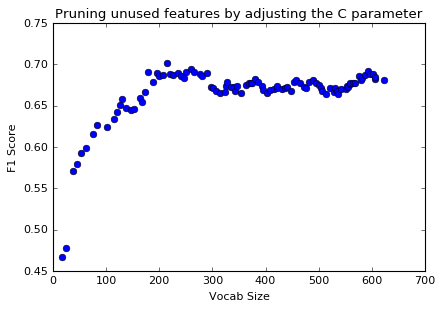

In [12]:
#### WARNING: This cell takes a long time to compute ####

# Make a plot showing accuracy of the re-trained model vs. 
# the vocabulary size you get when pruning unused features by adjusting the C parameter.

cs = np.linspace(0.01, 0.4, 100)
scores = []
vocab_sizes = []

# Loop through various values of C and store the results
for c in cs:
    # Train a logistic regression model using a "l1" penalty. 
    train_vector = CountVectorizer()
    X_train_matrix = train_vector.fit_transform(train_data)
    X_dev_matrix = train_vector.transform(dev_data)
    l1_model = LogisticRegression(penalty='l1', C = c)
    l1_model.fit(X_train_matrix, train_labels)
    vocab_all = pd.DataFrame(train_vector.get_feature_names())

    # Output the number of learned weights that are not equal to zero.
    coefs_l1 = pd.DataFrame(l1_model.coef_)
    l1_nonzerocount = coefs_l1.astype(bool).sum(axis=1).sum() # Total number of nonzero
    #print "Numer of 11 Non-zero weights: %s" % l1_nonzerocount
    
    # Select only nonzero rows
    df =coefs_l1.T
    nonzero_rows = df[(df.select_dtypes(include=['number']) != 0).any(1)]
    short_vocab = vocab_all.iloc[nonzero_rows.index]

    # Train using the small vocabulary
    train_vector = CountVectorizer(vocabulary=short_vocab[0])
    X_train_matrix = train_vector.transform(train_data)
    X_dev_matrix = train_vector.transform(dev_data)

    # Train the model and get score
    l2_model_pruned = LogisticRegression(penalty='l2')
    l2_model_pruned.fit(X_train_matrix, train_labels)
    pred = l2_model_pruned.predict(X_dev_matrix)
    score = metrics.f1_score(dev_labels, pred, average='weighted')
    
    # Pull the vocabulary size
    coefs_l2_pruned = pd.DataFrame(l2_model_pruned.coef_)
    vocab_size = coefs_l2_pruned.shape[1]
    
    # Store vocab and scores
    vocab_sizes.append(vocab_size)
    scores.append(score)

# Plot reults of 100 different C values
plt.figure()
plt.plot(vocab_sizes, scores, 'o')
plt.xlabel('Vocab Size')
plt.ylabel('F1 Score')
plt.title('Pruning unused features by adjusting the C parameter')

    ### STUDENT END ###
#P6()

(7) Use the TfidfVectorizer -- how is this different from the CountVectorizer? Train a logistic regression model with C=100.

Make predictions on the dev data and show the top 3 documents where the ratio R is largest, where R is:

maximum predicted probability / predicted probability of the correct label

What kinds of mistakes is the model making? Suggest a way to address one particular issue that you see.

In [13]:
#def P7():
### STUDENT START ###

# Setup TFIDF vector and transformed data
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(train_data)
X_dev_tfidf = tfidf.transform(dev_data)

# Create logistic Regression model with C=100
lr = LogisticRegression(C=100) 
lr.fit(X_tfidf, train_labels)
tfidf_preds = lr.predict(X_dev_tfidf)

# Find and print score
f1 = metrics.f1_score(y_true = dev_labels, y_pred = tfidf_preds, average='weighted')
print "The f1 score using TfidfVectorizer: " + str(f1)

####################
## Calculate R ratio
####################

# Store Prediction Probabilities from TFIDF model
dev_probs = lr.predict_proba(X_dev_tfidf)

# Create a pandas dataframe with probabilities
df_probs = pd.DataFrame(dev_probs)
# Add column headers
df_categories = ['alt.atheism','comp.graphics','sci.space','talk.religion.misc']
df_probs.columns = df_categories
# Create column with the correct category
df_probs['Correct'] = dev_labels
# Create column with the max probability for each observation
df_probs['Max Prob'] = df_probs[['alt.atheism','comp.graphics','sci.space','talk.religion.misc']].max(axis=1)

# Create a function to find the prediction of the correct variable
def correct_pred(row):
    if row['Correct'] == 0 :
        return row['alt.atheism']
    elif row['Correct'] == 1 :
        return row['comp.graphics']
    elif row['Correct'] == 2 :
        return row['sci.space']
    elif row['Correct'] == 3 :
        return row['talk.religion.misc']
    
# Apply function across all rows in the dataframe
df_probs['Correct Pred Prob'] = df_probs.apply ( lambda row: correct_pred (row), axis=1)
# Calculate the R ratio
df_probs['R Ratio'] = df_probs['Max Prob']/df_probs['Correct Pred Prob'] # Calculate R value
# Sort on R ratio
df_probs = df_probs.sort_values('R Ratio', ascending=False) # Sort on R
# Print the top 5 rows
df_probs.head(3)

The f1 score using TfidfVectorizer: 0.759766242785


,alt.atheism,comp.graphics,sci.space,talk.religion.misc,Correct,Max Prob,Correct Pred Prob,R Ratio
215,0.001966,0.993720,0.003245,0.001069,3,0.993720,0.001069,929.357956
665,0.002910,0.979746,0.014329,0.003015,3,0.979746,0.003015,325.004017
607,0.002422,0.020071,0.282045,0.695462,0,0.695462,0.002422,287.179093


In [14]:
# Print the top 3 examples with largest R ratio
print "------ DEV_DOCUMENT#: 215 ; PREDICTED: comp.graphics ; CORRECT:  talk.religion.misc -----\n"
print dev_data[215]
print "\n------ DEV_DOCUMENT#: 665 ; PREDICTED: comp.graphics ; CORRECT:  talk.religion.misc -----\n"
print dev_data[665]
print "\n------ DEV_DOCUMENT#: 607 ; PREDICTED: talk.religion.misc ; CORRECT:  alt.atheism -----\n"
print dev_data[607]

## STUDENT END ###
#P7()

------ DEV_DOCUMENT#: 215 ; PREDICTED: comp.graphics ; CORRECT:  talk.religion.misc -----

I am pleased to announce that a *revised version* of _The Easy-to-Read Book
of Mormon_ (former title: _Mormon's Book_) by Lynn Matthews Anderson is now
available through anonymous ftp (see information below). In addition to the
change in title, the revised ETR BOM has been shortened by several pages
(eliminating many extraneous "that's" and "of's"), and many (minor) errors
have been corrected. This release includes a simplified Joseph Smith Story,
testimonies of the three and eight witnesses, and a "Words-to-Know"
glossary.

As with the previous announcement, readers are reminded that this is a
not-for-profit endeavor. This is a copyrighted work, but people are welcome
to make *verbatim* copies for personal use. People can recuperate the
actual costs of printing (paper, copy center charges), but may not charge
anything for their time in making copies, or in any way realize a profit
from the use o

### ANSWER: 

#### How is TfidfVectorizer different from the CountVectorizer?
Per wikipedia, the tf-idf value increases proportionally to the number of times a word appears in the document. The vecotirizer therefore classifies longer documents better than short ones.

#### What kinds of mistakes is the model making?
The first example seems to be a situation where the topic of the post is loosely related to the actual forum. This is understandable. The next two looks to be short posts which have words.

#### Suggest a way to address one particular issue that you see.
To address this issue you can adjust a minimum and/or maximum threshold for word frequency when creating the vocabulary. This can be done using the `min_df` and `max_df` parameters within TfidfVectorizer

(8) EXTRA CREDIT

Try implementing one of your ideas based on your error analysis. Use logistic regression as your underlying model.

In [15]:
#############################################
# Baseline TFIDF vector and transformed data
#############################################

tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(train_data)
X_dev_tfidf = tfidf.transform(dev_data)

# Create logistic Regression model with C=100
lr = LogisticRegression(C=100) 
lr.fit(X_tfidf, train_labels)
tfidf_preds = lr.predict(X_dev_tfidf)

# Find and print score
base_tfidf_f1 = metrics.f1_score(y_true = dev_labels, y_pred = tfidf_preds, average='weighted')
print "The baseline f1 score using TfidfVectorizer: " + str(base_tfidf_f1)

###################################################
# Attempt 1 - Using Bigram instead of single words
###################################################


tfidf = TfidfVectorizer(ngram_range=(2,2))
X_tfidf = tfidf.fit_transform(train_data)
X_dev_tfidf = tfidf.transform(dev_data)

# Create logistic Regression model with C=100
lr = LogisticRegression(C=100) 
lr.fit(X_tfidf, train_labels)
tfidf_preds = lr.predict(X_dev_tfidf)

# Find and print score
f1 = metrics.f1_score(y_true = dev_labels, y_pred = tfidf_preds, average='weighted')
print "The bigram f1 score using TfidfVectorizer: " + str(f1)

###################################################
# Attempt 2 - Removing Stop Words
###################################################


tfidf = TfidfVectorizer(stop_words='english')
X_tfidf = tfidf.fit_transform(train_data)
X_dev_tfidf = tfidf.transform(dev_data)

# Create logistic Regression model with C=100
lr = LogisticRegression(C=100) 
lr.fit(X_tfidf, train_labels)
tfidf_preds = lr.predict(X_dev_tfidf)

# Find and print score
f1 = metrics.f1_score(y_true = dev_labels, y_pred = tfidf_preds, average='weighted')
print "The stopwords removed f1 score using TfidfVectorizer: " + str(f1)

###################################################
# Attempt 3 - Increase max_df 
# max df = When building the vocabulary ignore terms that have a document 
# frequency strictly higher than the given threshold
###################################################


tfidf = TfidfVectorizer(max_df = 2)
X_tfidf = tfidf.fit_transform(train_data)
X_dev_tfidf = tfidf.transform(dev_data)

# Create logistic Regression model with C=100
lr = LogisticRegression(C=100) 
lr.fit(X_tfidf, train_labels)
tfidf_preds = lr.predict(X_dev_tfidf)

# Find and print score
f1 = metrics.f1_score(y_true = dev_labels, y_pred = tfidf_preds, average='weighted')
print "The max_df=2 f1 score using TfidfVectorizer: " + str(f1)

The baseline f1 score using TfidfVectorizer: 0.759766242785
The bigram f1 score using TfidfVectorizer: 0.690625299375
The stopwords removed f1 score using TfidfVectorizer: 0.77689007055
The max_df=2 f1 score using TfidfVectorizer: 0.541127469883


The max_df=1 f1 score using TfidfVectorizer: 0.759766242785
The max_df=2 f1 score using TfidfVectorizer: 0.771348096797
The max_df=3 f1 score using TfidfVectorizer: 0.752761788251
The max_df=4 f1 score using TfidfVectorizer: 0.742582140399
The max_df=5 f1 score using TfidfVectorizer: 0.74947048249
The max_df=6 f1 score using TfidfVectorizer: 0.74115702539
The max_df=7 f1 score using TfidfVectorizer: 0.736076642761
The max_df=8 f1 score using TfidfVectorizer: 0.721859362135
The max_df=9 f1 score using TfidfVectorizer: 0.732453552716


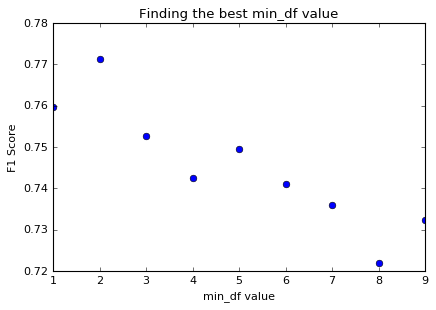

In [16]:
###################################################
# Attempt 4 - find best min_df value
###################################################
min_df = []
score_mindf = []

for x in range(1,10):
    tfidf = TfidfVectorizer(min_df = x)
    X_tfidf = tfidf.fit_transform(train_data)
    X_dev_tfidf = tfidf.transform(dev_data)
    
    # Create logistic Regression model with C=100
    lr = LogisticRegression(C=100) 
    lr.fit(X_tfidf, train_labels)
    tfidf_preds = lr.predict(X_dev_tfidf)
    
    # Find and print score
    f1 = metrics.f1_score(y_true = dev_labels, y_pred = tfidf_preds, average='weighted')
    print "The max_df="+ str(x) + " f1 score using TfidfVectorizer: " + str(f1)
    
    #Store max_df and score
    min_df.append(x)
    score_mindf.append(f1)

    
plt.figure()
plt.plot(min_df, score_mindf, 'o')
plt.xlabel('min_df value')
plt.ylabel('F1 Score')
plt.title('Finding the best min_df value')

## min_df = 2 appears to display the best results when no max_df is set

The best value for max_df: 93 with a score of: 0.782611347393


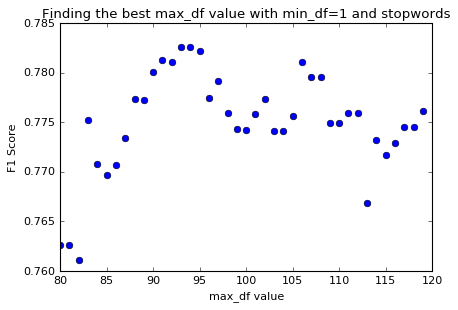

In [17]:
###################################################
# Attempt 5 - find best max_df value where min_df = 1 and stopwords
###################################################
max_df = []
score_maxdf = []
best_max_df = 0
best_score_max_df = 0

for x in range(80,120):
    tfidf = TfidfVectorizer(max_df = x, min_df=1, stop_words='english')
    X_tfidf = tfidf.fit_transform(train_data)
    X_dev_tfidf = tfidf.transform(dev_data)
    
    # Create logistic Regression model with C=100
    lr = LogisticRegression(C=100) 
    lr.fit(X_tfidf, train_labels)
    tfidf_preds = lr.predict(X_dev_tfidf)
    
    # Find and print score
    f1 = metrics.f1_score(y_true = dev_labels, y_pred = tfidf_preds, average='weighted')    
    #Store max_df and score
    max_df.append(x)
    score_maxdf.append(f1)
    
    if f1 > best_score_max_df:
        best_max_df = x
        best_score_max_df =f1

print "The best value for max_df: " + str(best_max_df) + " with a score of: " + str(best_score_max_df)
    
plt.figure()
plt.plot(max_df, score_maxdf, 'o')
plt.xlabel('max_df value')
plt.ylabel('F1 Score')
plt.title('Finding the best max_df value with min_df=1 and stopwords')

The best value for max_df: 244 with a score of: 0.783148165342


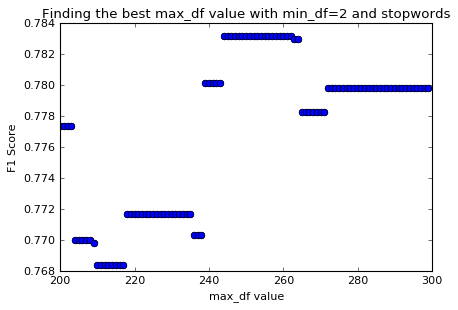

In [18]:
###################################################
# Attempt 6 - find best max_df value where min_df = 2 and stopwords
###################################################
max_df = []
score_maxdf = []
best_max_df = 0
best_score_max_df = 0

for x in range(200,300,1):
    tfidf = TfidfVectorizer(max_df = x, min_df=2, stop_words='english')
    X_tfidf = tfidf.fit_transform(train_data)
    X_dev_tfidf = tfidf.transform(dev_data)
    
    # Create logistic Regression model with C=100
    lr = LogisticRegression(C=100) 
    lr.fit(X_tfidf, train_labels)
    tfidf_preds = lr.predict(X_dev_tfidf)
    
    # Find and print score
    f1 = metrics.f1_score(y_true = dev_labels, y_pred = tfidf_preds, average='weighted')
    
    #Store max_df and score
    max_df.append(x)
    score_maxdf.append(f1)
    
    if f1 > best_score_max_df:
        best_max_df = x
        best_score_max_df =f1
    
    #Store max_df and score
    max_df.append(x)
    score_maxdf.append(f1)

print "The best value for max_df: " + str(best_max_df) + " with a score of: " + str(best_score_max_df)

    
plt.figure()
plt.plot(max_df, score_maxdf, 'o')
plt.xlabel('max_df value')
plt.ylabel('F1 Score')
plt.title('Finding the best max_df value with min_df=2 and stopwords')

The best value for max_features: 27002 with a score of: 0.781314822522


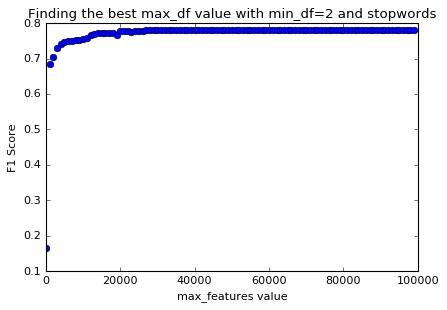

In [23]:
###################################################
# Attempt 7 - find best max_features value
###################################################
max_features = []
score_max_features = []
best_max_features = 0
best_score_max_features = 0

for x in range(2,100000,1000):
    tfidf = TfidfVectorizer(max_df = 91, min_df=1, stop_words='english',max_features=x)
    X_tfidf = tfidf.fit_transform(train_data)
    X_dev_tfidf = tfidf.transform(dev_data)
    
    # Create logistic Regression model with C=100
    lr = LogisticRegression(C=100) 
    lr.fit(X_tfidf, train_labels)
    tfidf_preds = lr.predict(X_dev_tfidf)
    
    # Find and print score
    f1 = metrics.f1_score(y_true = dev_labels, y_pred = tfidf_preds, average='weighted')    
    #Store max_df and score
    max_features.append(x)
    score_max_features.append(f1)
    
    if f1 > best_score_max_features:
        best_max_features = x
        best_score_max_features =f1

print "The best value for max_features: " + str(best_max_features) + " with a score of: " + str(best_score_max_features)
    
plt.figure()
plt.plot(max_features, score_max_features, 'o')
plt.xlabel('max_features value')
plt.ylabel('F1 Score')
plt.title('Finding the best max_df value with min_df=2 and stopwords')

# Adding max_features does not appear to show any improvement

In [20]:
###################################################
# Best Results 
###################################################

tfidf = TfidfVectorizer(max_df = 244, min_df=2, stop_words='english')
X_tfidf = tfidf.fit_transform(train_data)
X_dev_tfidf = tfidf.transform(dev_data)

# Create logistic Regression model with C=100
lr = LogisticRegression(C=100) 
lr.fit(X_tfidf, train_labels)
tfidf_preds = lr.predict(X_dev_tfidf)

# Find and print score
f1 = metrics.f1_score(y_true = dev_labels, y_pred = tfidf_preds, average='weighted')
print "The best results were found with the following settings:"
print "min_df = 2"
print "max_df = 244"
print "max_features = None"
print "stop_words='english'"
print "Best f1 score using TfidfVectorizer: " + str(f1)
print "Improvement upon baseline " + str(f1-base_tfidf_f1)

The best results were found with the following settings:
min_df = 2
max_df = 244
max_features = None
stop_words='english'
Best f1 score using TfidfVectorizer: 0.783148165342
Improvement upon baseline 0.0233819225562
